<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/HousePredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction using XG Boost Regression

In [43]:
#importing the dependencies
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [44]:
#Importing boston house price dataset
house_price_dataset=fetch_openml(name="house_prices", as_frame=True)
print(house_price_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorc

In [45]:
#load the dataset into pandas dataframe
house_price_df=pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [46]:
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [47]:
#add the target column to dataframe
house_price_df['Price']=house_price_dataset.target

In [48]:
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
#Checking the number of rows and columns in the dataframe
house_price_df.shape

(1460, 81)

In [50]:
#Check and Handle the missing values
house_price_df.isnull().sum()
house_price_df['LotFrontage'].fillna(house_price_df['LotFrontage'].mean(),inplace=True)

In [51]:
house_price_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [52]:
#statistical measures
house_price_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


UnderStanding the Correlation between various features in the dataset

In [53]:
#Data Analyisis
#Positive and Negative Correlations
# Select only numeric columns
numeric_columns = house_price_df.select_dtypes(include='number')

# Compute correlation
correlation = numeric_columns.corr()


<Axes: >

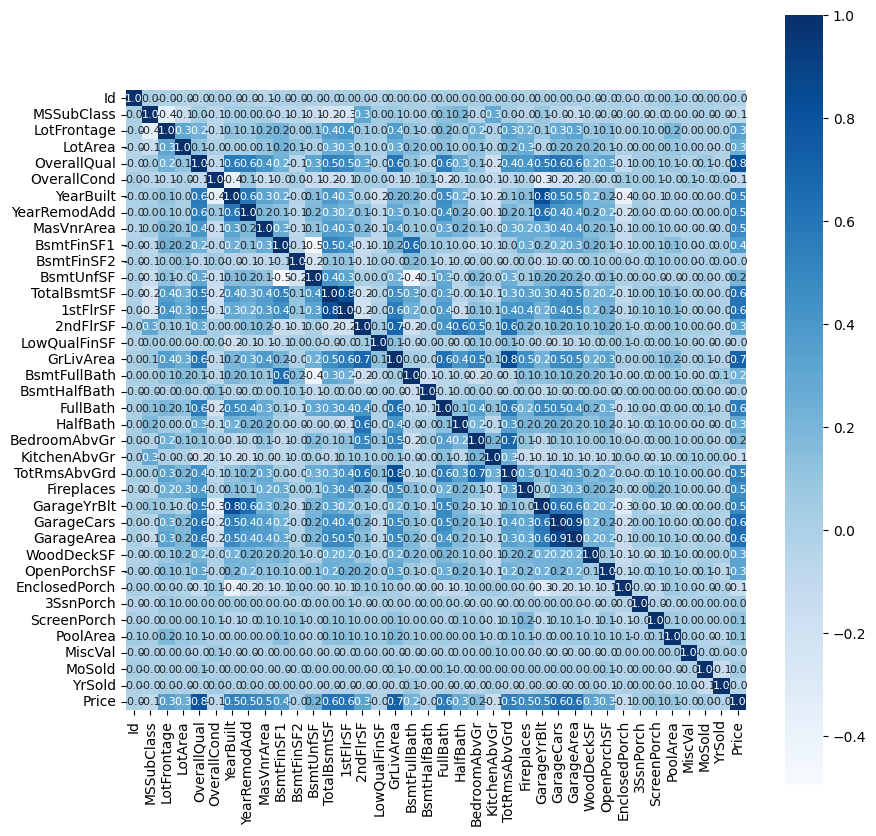

In [54]:
#Plotting the heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [55]:
#Splitting the data into data and labels
X=house_price_df.drop(columns='Price',axis=1)
Y=house_price_df['Price']

In [56]:
print(X)
print(Y)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [57]:
#Split the data into train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)
print(X.shape,X_train.shape,X_test.shape)

(1460, 80) (1168, 80) (292, 80)


Model Training

In [58]:
# XGBoost Regressor
#loading the model
model=XGBRegressor()

In [59]:
#Training the model with X_train
# Assuming cat_columns contains the list of categorical column names
# Get the list of categorical column names
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=cat_columns)
model.fit(X_train_encoded,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
#Evaluate the model Performance
#Prediction on training data
#accuracy for prediction on training data
training_data_prediction=model.predict(X_train_encoded)

In [61]:
print(training_data_prediction)

[146340.    106517.375 168685.36  ... 127050.11   88829.28   80900.39 ]


In [62]:
#Evaluation Metrics
# R squared Error and Mean Absolute Error
score_1=metrics.r2_score(Y_train,training_data_prediction)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_train,training_data_prediction)

print(f'R Squared Error: {score_1}')
print(f'Mean Absolute Error: {score_2}')

R Squared Error: 0.9998532139950671
Mean Absolute Error: 669.6260066620291


In [63]:
# Get the list of categorical column names from test data
cat_columns_test = X_test.select_dtypes(include=['object']).columns.tolist()

# Encode categorical variables in test data using one-hot encoding
X_test_encoded = pd.get_dummies(X_test, columns=cat_columns_test)

# Align test data with training data columns
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make predictions on the encoded test data
test_data_prediction = model.predict(X_test_encoded)

# Print the predictions
print(test_data_prediction)


[201507.97  166891.75  112587.414  75432.65  149209.56  362211.8
 316592.03  148223.98  226797.02  254224.42  174870.39   64602.31
 185496.92  315649.    221933.88  110348.195 119886.875 116651.016
 223830.42  121735.4   127576.75  105125.07  278563.    336083.3
  73671.7   190719.02  125143.375 181722.03  560074.3   130508.65
 107714.11  127264.29  128927.83   91253.055 158792.77  355869.66
 130506.52   86898.31  239351.61  113558.29  144551.8   142944.16
  74309.195 126856.63  168639.17  169602.03  134905.11  171700.47
 274051.78  266077.88  106881.02  255785.75  118129.01  210022.52
 180832.34  106489.98  125859.195 172908.56  125870.75  177121.28
 167573.5   293480.16   82910.75  128002.9   149417.55  133225.22
 147090.69  199553.81  152357.5   147244.47  186150.4   128714.61
 330476.5   149777.9   151675.25  222410.33  174976.7   146238.81
 382708.62  168358.88  184281.52  138264.17  137642.36  139291.1
 184539.    145783.36  160882.39  154665.23  192147.83  174855.28
 179057.4   

In [64]:
#Evaluation Metrics
# R squared Error and Mean Absolute Error
score_1=metrics.r2_score(Y_test,test_data_prediction)

#Mean Absolute Error
score_2=metrics.mean_absolute_error(Y_test,test_data_prediction)

print(f'R Squared Error: {score_1}')
print(f'Mean Absolute Error: {score_2}')

R Squared Error: 0.8559134385142966
Mean Absolute Error: 16707.882424550513


Visualize the actual price and predicted prices

Text(0.5, 1.0, 'Actual Vs Predicted Prices')

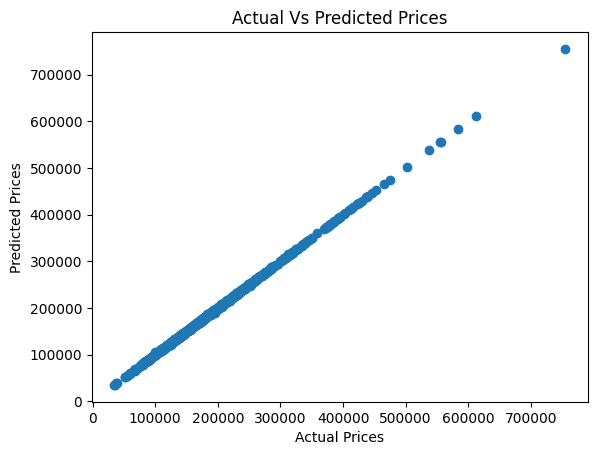

In [65]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel("Predicted Prices")
plt.title('Actual Vs Predicted Prices')

In [66]:
import pandas as pd
import numpy as np

# Sample input data
data = {
    'Id': [1],
    'MSSubClass': [60],
    'MSZoning': ['RL'],
    'LotFrontage': [65.0],
    'LotArea': [8450],
    'Street': ['Pave'],
    'Alley': [np.nan],
    'LotShape': ['Reg'],
    # Add all other columns as needed
}

# Create DataFrame for the single input
single_input_df = pd.DataFrame(data)

# Encode categorical variables in the single input data using one-hot encoding
cat_columns = single_input_df.select_dtypes(include=['object']).columns.tolist()
single_input_encoded = pd.get_dummies(single_input_df, columns=cat_columns)

# Align single input with training data columns
# Assuming X_train_encoded is the DataFrame used for training, with all encoded columns
single_input_encoded = single_input_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Make prediction using the trained model
prediction = model.predict(single_input_encoded)

# Print the prediction
print(prediction)


[42661.332]


In [67]:
import pickle

In [68]:
pickle.dump(model,open('regmodel.pkl','wb'))

In [69]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [70]:
test_pred=pickled_model.predict(X_test_encoded)
print(test_pred)

[201507.97  166891.75  112587.414  75432.65  149209.56  362211.8
 316592.03  148223.98  226797.02  254224.42  174870.39   64602.31
 185496.92  315649.    221933.88  110348.195 119886.875 116651.016
 223830.42  121735.4   127576.75  105125.07  278563.    336083.3
  73671.7   190719.02  125143.375 181722.03  560074.3   130508.65
 107714.11  127264.29  128927.83   91253.055 158792.77  355869.66
 130506.52   86898.31  239351.61  113558.29  144551.8   142944.16
  74309.195 126856.63  168639.17  169602.03  134905.11  171700.47
 274051.78  266077.88  106881.02  255785.75  118129.01  210022.52
 180832.34  106489.98  125859.195 172908.56  125870.75  177121.28
 167573.5   293480.16   82910.75  128002.9   149417.55  133225.22
 147090.69  199553.81  152357.5   147244.47  186150.4   128714.61
 330476.5   149777.9   151675.25  222410.33  174976.7   146238.81
 382708.62  168358.88  184281.52  138264.17  137642.36  139291.1
 184539.    145783.36  160882.39  154665.23  192147.83  174855.28
 179057.4   

In [71]:
print(pickled_model.predict(single_input_encoded))

[42661.332]
